<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML321ENSkillsNetwork817-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis on Online Course Enrollment Data**


Before we keep our heads down building a cool personalized online courses recommender system, we always need to take a look at data first since it is the essence of any machine learning system. We need to explore what kind of data we will need and what such data would look like.


You have already learned it is important to perform initial investigations on the data and how to perform exploratory data analysis to find preliminary insights such as data patterns and to check assumptions with the help of summary statistics and graphical representations. 

Now, let's apply your EDA skills to online courses related datasets such as course titles/genres and course enrollments. 


## Objectives


After completing this lab you will be able to:


* Identify keywords in course titles using a WordCloud
* Calculate the summary statistics and visualizations of the online course content dataset
* Determine popular course genres
* Calculate the summary statistics and create visualizations of the online course enrollment dataset
* Identify courses with the greatest number of enrolled students


----


## Prepare and setup the lab environment


At the beginning, we need to install two required Python packages:


In [38]:
!pip install seaborn
!pip install wordcloud
!pip install pandas
!pip install matplotlib

and import necessary class/methods in the packages


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [40]:
# also set a random state
rs = 123

### Load and explore the dataset


First, let's load the datasets as `Pandas` dataframes and start some basic exploratory data analysis tasks on them.


In [41]:
# Point to the datasets stored on the cloud
course_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_genre.csv"
ratings_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-ML0321EN-Coursera/labs/v2/module_3/ratings.csv"

In [42]:
course_df = pd.read_csv(course_genre_url)
ratings_df = pd.read_csv(ratings_url)

We will start by exploring the course genre dataset. Let's first check its columns/features name:


In [43]:
course_df.columns

Index(['COURSE_ID', 'TITLE', 'Database', 'Python', 'CloudComputing',
       'DataAnalysis', 'Containers', 'MachineLearning', 'ComputerVision',
       'DataScience', 'BigData', 'Chatbot', 'R', 'BackendDev', 'FrontendDev',
       'Blockchain'],
      dtype='object')

We can see from the above cell output that the columns represent some metadata about a course such as its id, title, and genres. We can see that the course genres are some popular topics related to machine learning, databases, app developments, etc.


We can also check how many unique courses we have in this dataset:


In [44]:
course_df.shape[0]

307

Then we can take a quick look at its header rows


In [45]:
course_df.head()

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [46]:
course_df.dtypes

COURSE_ID          object
TITLE              object
Database            int64
Python              int64
CloudComputing      int64
DataAnalysis        int64
Containers          int64
MachineLearning     int64
ComputerVision      int64
DataScience         int64
BigData             int64
Chatbot             int64
R                   int64
BackendDev          int64
FrontendDev         int64
Blockchain          int64
dtype: object

As we can see, the `COURSE_ID` and `TITLE` are `str` datatypes and all the course genres are binary/int datatypes. Any genre column with value 1 means the course is associated with the course genre while 0 means the course is not.


For example, the following course `accelerating deep learning with gpu` is associated with genres `Python`, `MachineLearning`, and `DataScience`


In [47]:
course_df.iloc[1, ]

COURSE_ID                                     ML0122EN
TITLE              accelerating deep learning with gpu
Database                                             0
Python                                               1
CloudComputing                                       0
DataAnalysis                                         0
Containers                                           0
MachineLearning                                      1
ComputerVision                                       0
DataScience                                          1
BigData                                              0
Chatbot                                              0
R                                                    0
BackendDev                                           0
FrontendDev                                          0
Blockchain                                           0
Name: 1, dtype: object

Next, let's focus on the course title column by trying to determine keywords in the titles. Those keywords in the titles may give us a more intuitive summary of what kind of courses we have in the dataset.


### Plot a Word Cloud from Course Titles


First, let's join all the title values into one string, then we can conveniently get a wordcloud from the big string:


In [48]:
titles = " ".join(title for title in course_df['TITLE'].astype(str))

In [49]:
titles

'robots are coming  build iot apps with watson  swift  and node red accelerating deep learning with gpu consuming restful services using the reactive jax rs client analyzing big data in r using apache spark containerizing  packaging  and running a spring boot application cloud native security conference  data security data science bootcamp with r for university proffesors learn how to use docker containers for iterative development scorm test course create your first mongodb database testing microservices with the arquillian managed container cloud pak for integration essentials watson analytics for social media data science bootcamp with python for university professors  advance create a cryptocurrency trading algorithm in python data   ai essentials securing java microservices with eclipse microprofile json web token  microprofile jwt  enabling distributed tracing in microservices with zipkin sql access for hadoop ybrid cloud conference  ai pipelines lab dataops methodology data   ai

We also want to filter common stop words and some less meaningful words:


In [50]:
# English Stopwords
stopwords = set(STOPWORDS)
stopwords.update(["getting started", "using", "enabling", "template", "university", "end", "introduction", "basic"])

Then, we create a ```WordCloud``` object and generate ```wordcloud``` from the titles.


In [51]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400)

In [52]:
wordcloud.generate(titles)

We can use `plt.imshow()` method to visualize the generated wordcloud:


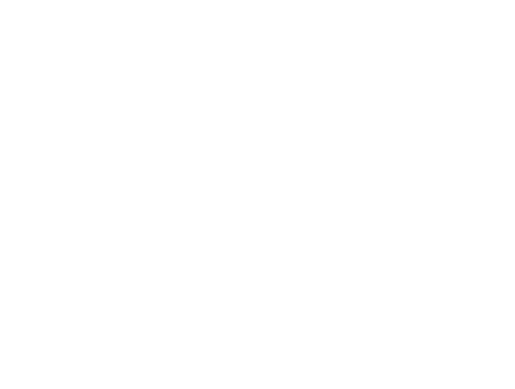

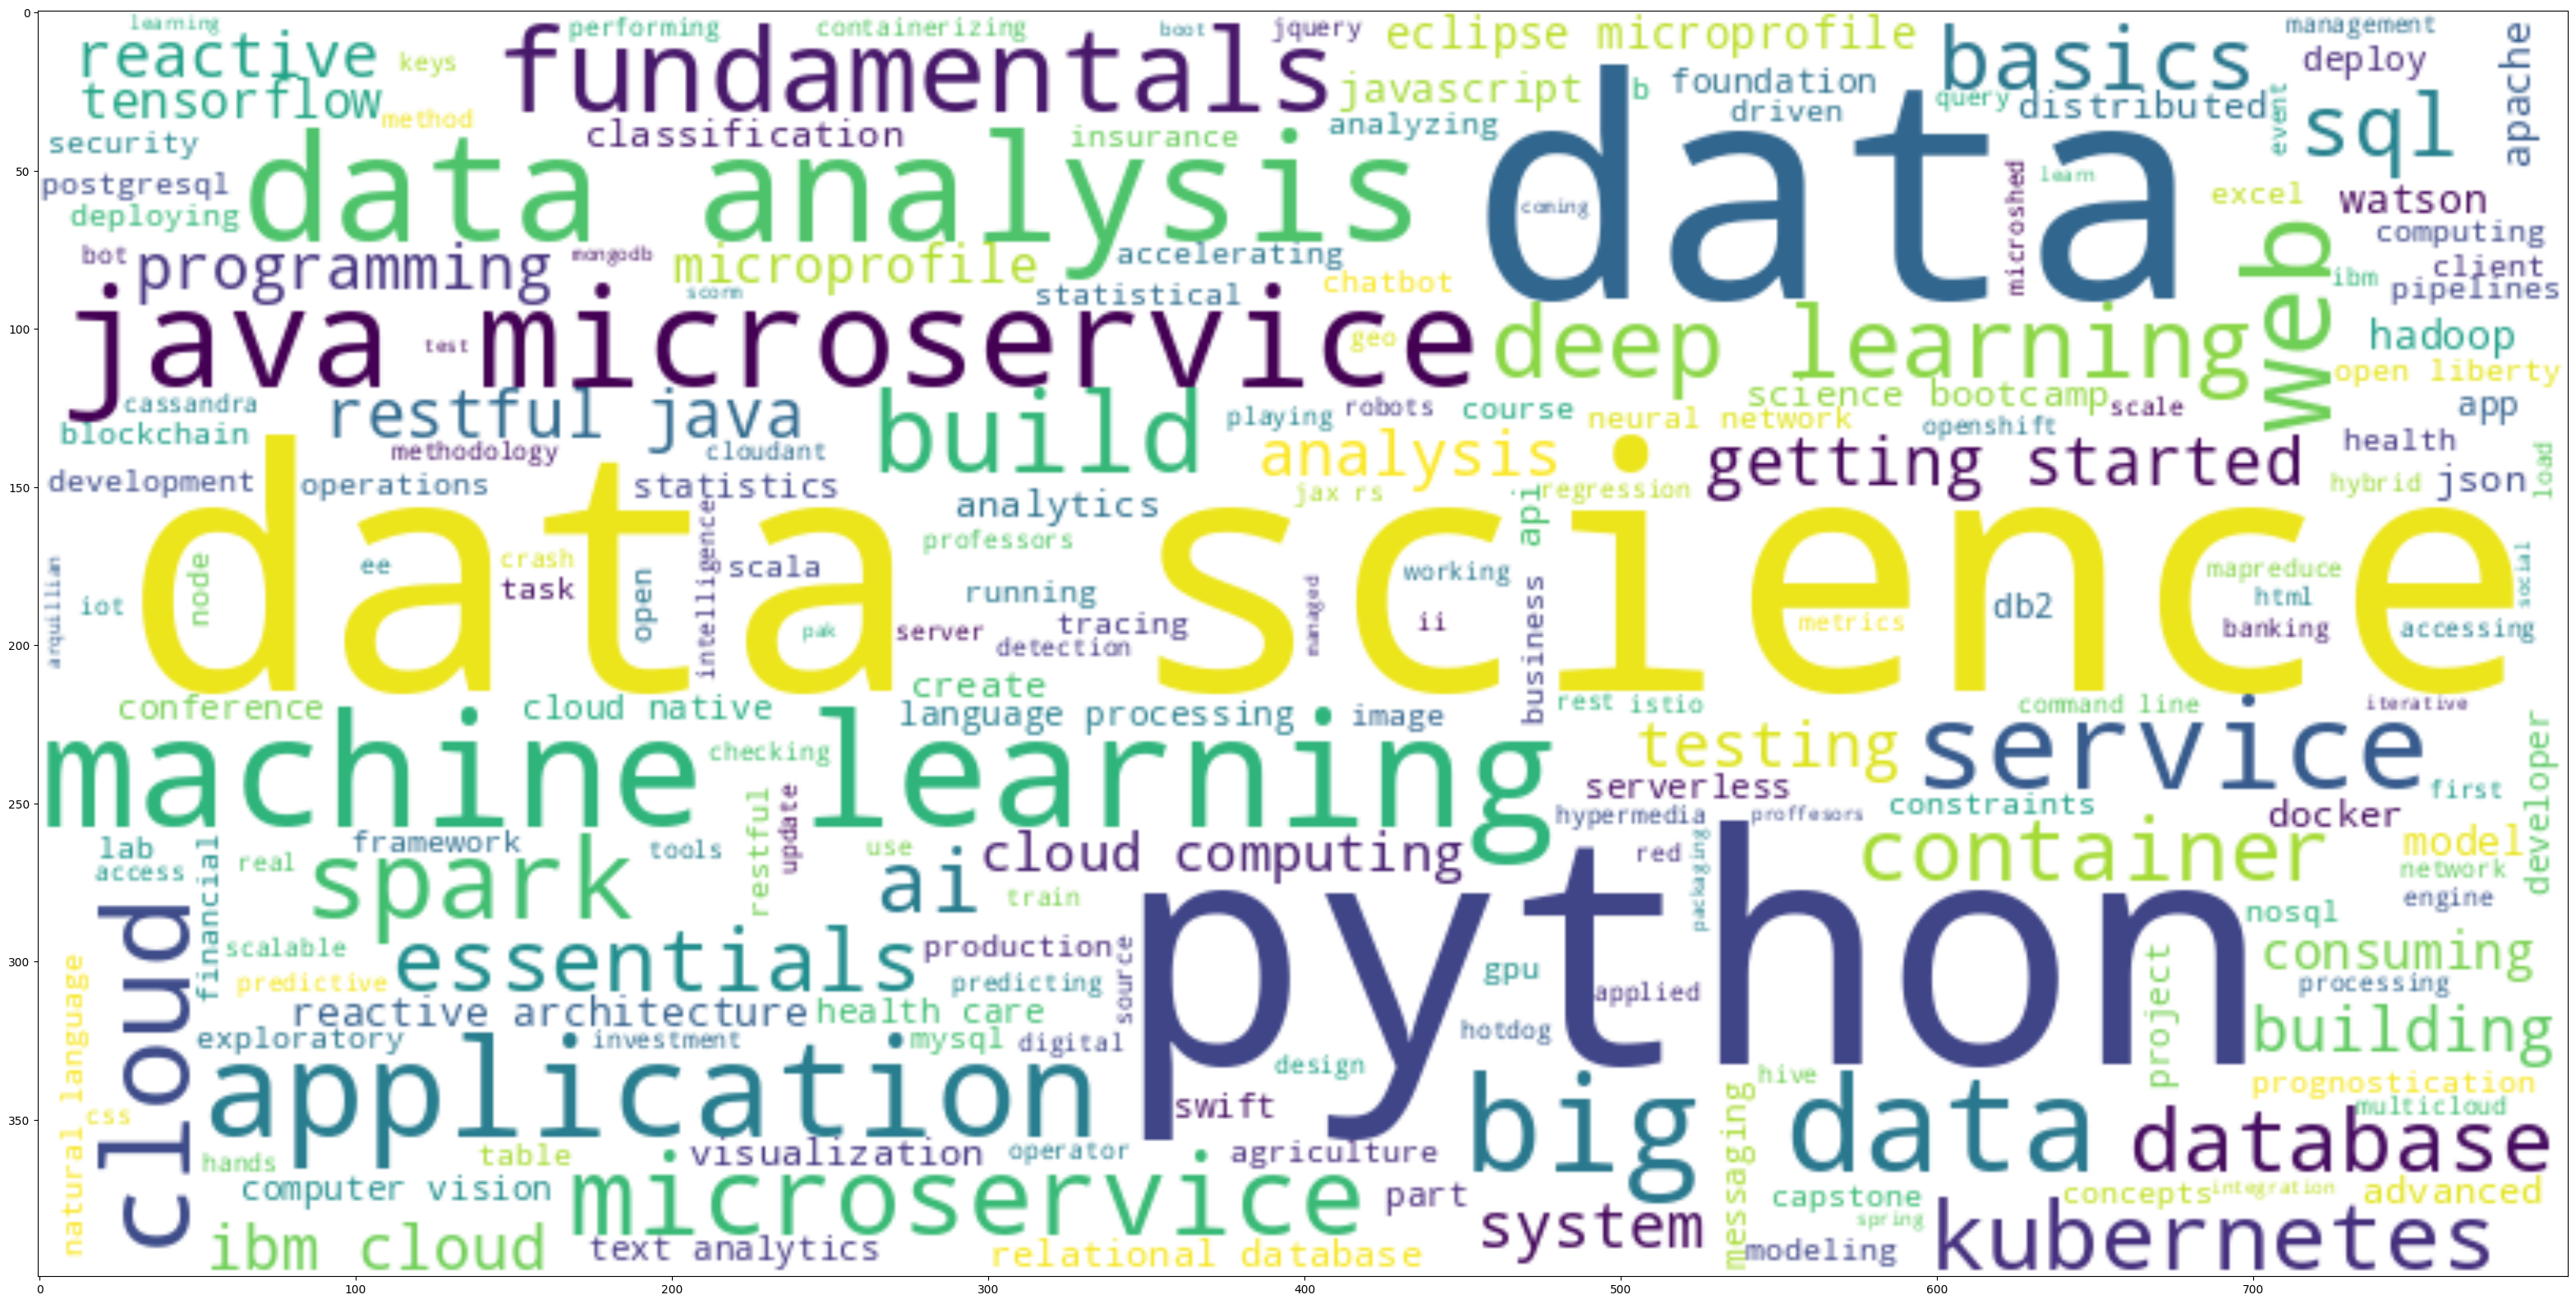

In [53]:
# Disable axis display
plt.axis("off")
# Create a new figure with a specified size
plt.figure(figsize=(40,20))
# Adjust the layout to ensure tight spacing
plt.tight_layout(pad=0)
# Display the word cloud image with bilinear interpolation
plt.imshow(wordcloud, interpolation='bilinear')
# Show the plot
plt.show()

As we can see from the ```wordcloud```,  there are many popular IT related keywords such as python, data science, machine learning, big data, ai, tensorflow, container, cloud, etc. By looking at these keywords, we should have a general understanding that the courses in the dataset are focused on demanding IT skills.


Next, you need to perform some more detailed analysis on the course dataset.


### Analyze Course Genres


First, you can try to find out which courses may be of interest you. For example, what are the all machine learning related courses?


_Find all courses with genre `MachineLearning` == 1_

In [54]:
machine_learning_courses = course_df[course_df['MachineLearning'] == 1]
print(machine_learning_courses)

      COURSE_ID                                              TITLE  Database  \
1      ML0122EN                accelerating deep learning with gpu         0   
15     DAI101EN                               data   ai essentials         0   
19     HCC105EN           ybrid cloud conference  ai pipelines lab         0   
21     DS0132EN                  data   ai  jumpstart your journey         0   
24     BENTEST4                 ai for everyone  master the basics         0   
..          ...                                                ...       ...   
274  excourse61        convolutional neural networks in tensorflow         0   
282  excourse69                     machine learning with big data         0   
290  excourse77  natural language processing with attention models         0   
291  excourse78   natural language processing with sequence models         0   
292  excourse79  natural language processing with probabilistic...         0   

     Python  CloudComputing  DataAnalys

Similarly, you can try to find out what are the scalable machine learning courses?


_Find all courses with genres `MachineLearning` == 1 and `BigData` == 1_


In [55]:
ml_bigdata_courses = course_df[(course_df['MachineLearning'] == 1) & (course_df['BigData'] == 1)]
print(ml_bigdata_courses)

      COURSE_ID                                              TITLE  Database  \
46   GPXX0BUBEN  insurance risk assessment with montecarlo meth...         0   
59     TA0106EN                            text analytics at scale         0   
184    BD0221EN                                        spark mllib         0   
282  excourse69                     machine learning with big data         0   

     Python  CloudComputing  DataAnalysis  Containers  MachineLearning  \
46        0               0             0           0                1   
59        0               0             0           0                1   
184       0               0             0           0                1   
282       0               0             0           0                1   

     ComputerVision  DataScience  BigData  Chatbot  R  BackendDev  \
46                0            0        1        0  0           0   
59                0            1        1        0  0           0   
184               0  

In [56]:
genres = course_df.columns[2:]
genres

Index(['Database', 'Python', 'CloudComputing', 'DataAnalysis', 'Containers',
       'MachineLearning', 'ComputerVision', 'DataScience', 'BigData',
       'Chatbot', 'R', 'BackendDev', 'FrontendDev', 'Blockchain'],
      dtype='object')

Given all the course genres, now let's calculate the course count for each genre. e.g., there are 69 courses that belong to the `MachineLearning` genre and 23 courses that belong to the `Python` genre. We also want to sort the genre count list to find the most popular course genres.


_Use the Pandas dataframe sum() and sort_values() methods to genreate a sorted course count per genre. You may also implement the task with different solutions_


In [57]:
genre_counts = course_df.drop(['COURSE_ID', 'TITLE'], axis=1).sum().sort_values(ascending=False)
print(genre_counts)

BackendDev         78
MachineLearning    69
Database           60
DataAnalysis       56
DataScience        38
CloudComputing     37
BigData            36
Python             28
FrontendDev        19
Containers         17
R                  17
ComputerVision     10
Chatbot             4
Blockchain          4
dtype: int64


We can also visualize course genre counts using a bar chart:


_Use seaborn barplot or other plot methods to plot course genre counts using a barchart. The x-axis is the course genre and the y-axis is the course count per genre._


/tmp/ipykernel_300/1384151259.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Count', data=genre_counts_df, palette='viridis')


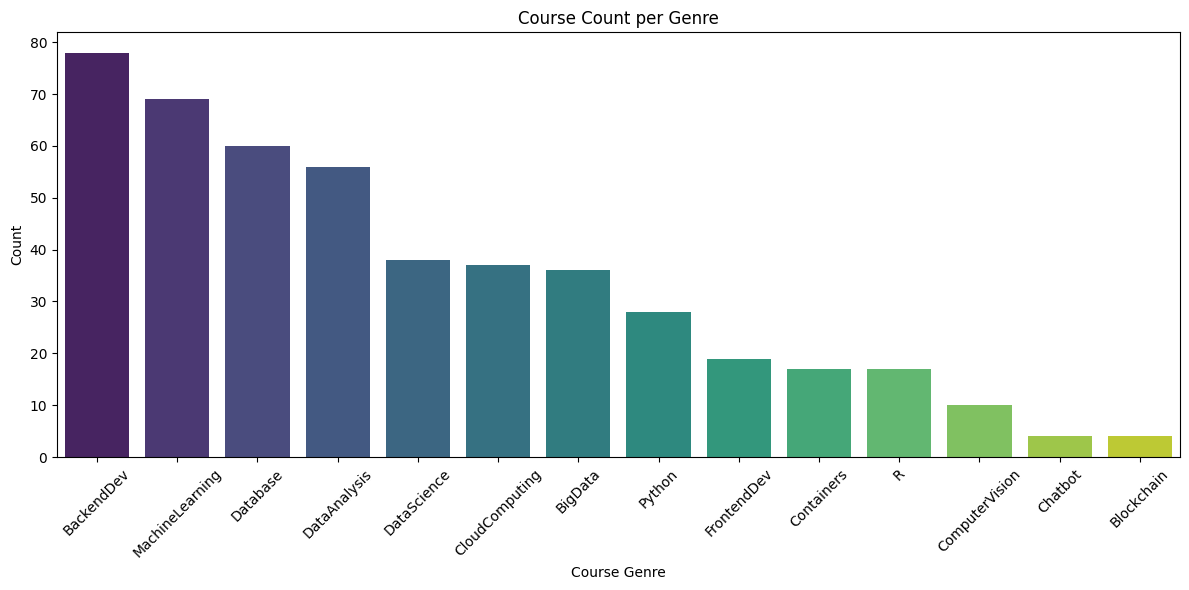

In [58]:
genre_counts = course_df.drop(['COURSE_ID', 'TITLE'], axis=1).sum().sort_values(ascending=False)
genre_counts_df = genre_counts.reset_index()
genre_counts_df.columns = ['Genre', 'Count']
plt.figure(figsize=(12,6))
sns.barplot(x='Genre', y='Count', data=genre_counts_df, palette='viridis')
plt.xticks(rotation=45)  
plt.xlabel("Course Genre")
plt.ylabel("Count")
plt.title("Course Count per Genre")
plt.tight_layout()
plt.show()


###  Analyze Course Enrollments


Let's first take a look at the course enrollments dataset.


In [59]:
ratings_df.head()

,user,item,rating
0,1889878,CC0101EN,5
1,1342067,CL0101EN,3
2,1990814,ML0120ENv3,5
3,380098,BD0211EN,5
4,779563,DS0101EN,3


This dataset contains three colums, `user` representing a unique user id, `item` representing a course id, and `rating` representing the ratings given by the user.


In [60]:
ratings_df['rating'].unique()

array([5, 3, 4])

The **rating** column consists of three potential values: 

- A rating of <code>5</code> signifies that users who have enrolled in the course find it excellent and have given it the highest rating, thus recommending it to other learners. 

- A rating of <code>4</code>, indicates that the enrolled users perceive the course as good and will recommend to the other learners,but suggest minor improvements. 

- A rating of <code>3</code>indicates that enrolled users find the course below expectations and need significant modifications.


Let's see how many ratings we have in the dataset:


In [61]:
ratings_df.shape[0]

233306

We have 233306 enrollments. In fact, each user is likely to interact with multiple items so let's find the rating counts for each user:


_Apply Pandas' groupby() and size() method on the user column to aggregate the rating count for each user, then report the total number of users after aggregation._


In [62]:
user_rating_counts = ratings_df.groupby('user').size()
total_users = user_rating_counts.shape[0]
print("Total number of users:", total_users)

Total number of users: 33901


After the aggregation, you should get a new dataframe showing the rating count for each user. For example, user 4 rated 44 items and user 2 rated 61 items. Next, let's try to get some summary statistics and visualizations from the user ratings count dataframe.


_Use describe() to report the statistics summary of the user enrollments._


In [63]:
user_rating_counts = ratings_df.groupby('user').size()
summary_statistics = user_rating_counts.describe()
print(summary_statistics)

count    33901.000000
mean         6.881980
std          5.823548
min          1.000000
25%          2.000000
50%          6.000000
75%          9.000000
max         61.000000
dtype: float64


We can also get a histogram showing the enrollment distributions, e.g., how many users rated just 1 item or how many rated 10 items, etc.


_Plot the histogram of user rating counts._


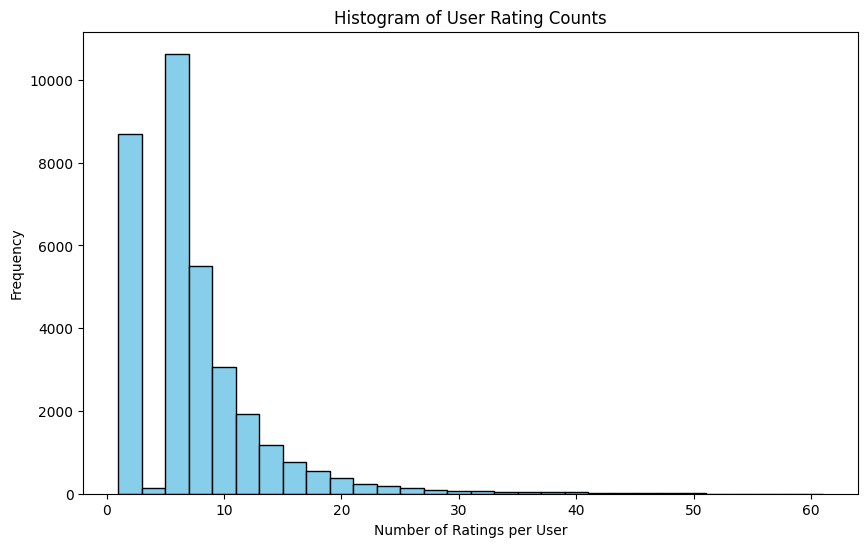

In [64]:
user_rating_counts = ratings_df.groupby('user').size()
plt.figure(figsize=(10, 6))
plt.hist(user_rating_counts, bins=30, color="skyblue", edgecolor="black")
plt.title("Histogram of User Rating Counts")
plt.xlabel("Number of Ratings per User")
plt.ylabel("Frequency")
plt.show()

### Task: Find the Top-20 Most Popular Courses


Now we know how many items each user rated. Let's see the most popular 20 courses, i.e., items with the most rating counts.


_Use Pandas groupby() and size() methods on the item column to aggregate the rating count for each item, then use the sort_values() method to sort the course enrollment count, and use the slice method to get the top 20 courses. You may also implement this task with different solutions_


In [65]:
ratings_df = ratings_df.groupby('item').size()  
ratings_df = ratings_df.sort_values(ascending=False)  
ratings_df.head(20)

item
PY0101EN      14936
DS0101EN      14477
BD0101EN      13291
BD0111EN      10599
DA0101EN       8303
DS0103EN       7719
ML0101ENv3     7644
BD0211EN       7551
DS0105EN       7199
BC0101EN       6719
DV0101EN       6709
ML0115EN       6323
CB0103EN       5512
RP0101EN       5237
ST0101EN       5015
CC0101EN       4983
CO0101EN       4480
DB0101EN       3697
BD0115EN       3670
DS0301EN       3624
dtype: int64

Now you may only see the item IDs which do not indicate what kind of courses they are. To make it more clear, we need to join the course titles in the course metadata dataset (`course_df`) so that we can identify what the most popular courses are immediately:


_Use Pandas merge() method to join the course_df (contains the course title column)._


In [66]:
ratings_df = ratings_df.to_frame()
merged_df = pd.merge(ratings_df,
                     course_df[['COURSE_ID', 'TITLE']],
                     how='left',
                     left_on='item',  
                     right_on='COURSE_ID')
merged_df.head(20)

,0,COURSE_ID,TITLE
0,14936,PY0101EN,python for data science
1,14477,DS0101EN,introduction to data science
2,13291,BD0101EN,big data 101
3,10599,BD0111EN,hadoop 101
4,8303,DA0101EN,data analysis with python
5,7719,DS0103EN,data science methodology
6,7644,ML0101ENv3,machine learning with python
7,7551,BD0211EN,spark fundamentals i
8,7199,DS0105EN,data science hands on with open source tools
9,6719,BC0101EN,blockchain essentials


It seems that those popular courses take a huge amount of total ratings. Let's find the exact percentage.


In [67]:
# Get the total course enrollments again
total = ratings_df.shape[0]
total

126

In [68]:
top = 0

_Get the percentage of the top-20 course enrollments._


In [69]:
total_enrollments = ratings_df.shape[0]
course_enrollments = ratings_df.groupby('item').size()
sorted_enrollments = course_enrollments.sort_values(ascending=False)
top_20_courses = sorted_enrollments.iloc[:20]
top_20_sum = top_20_courses.sum()
top_20_percentage = (top_20_sum / total_enrollments) * 100
print(f"The top 20 courses account for {top_20_percentage:.2f}% of all enrollments")

The top 20 courses account for 15.87% of all enrollments


Copyright © 2021 IBM Corporation. All rights reserved.
